Asilbek. Polynomial regression. Ice_cream_selling

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
#loading the data
data = pd.read_csv('Ice_cream_selling.csv')
X = data['Temperature (°C)'].values.reshape(-1, 1)
y = data['Ice Cream Sales (units)'].values

In [135]:
#creating polynomial features (degree = 2)
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [137]:
#fiting linear regression model on polynomial features
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [141]:
#make predictions
y_pred = model.predict(X_poly)
#calculating metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [145]:
#sorting data for plotting
sort_idx = X.flatten().argsort()
X_sorted = X[sort_idx].reshape(-1, 1)
X_poly_sorted = poly_features.transform(X_sorted)
#generating the curve
y_curve = model.predict(X_poly_sorted)

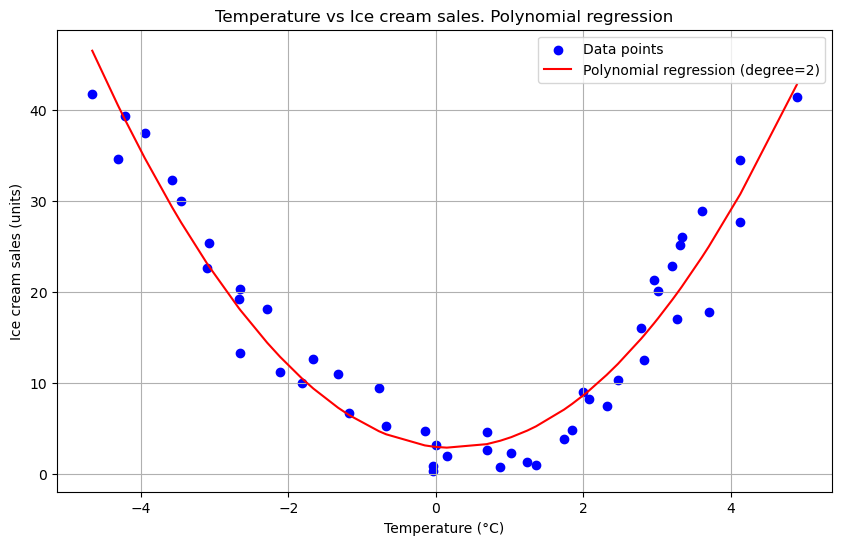

Polynomial regression results:
MSE: 10.00
R²: 0.9321
Coefficients: [ 0.         -0.82468167  1.82952623]
Intercept: 2.9517741579934498


In [159]:
#ploting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_sorted, y_curve, color='red', label='Polynomial regression (degree=2)')
plt.title('Temperature vs Ice cream sales. Polynomial regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice cream sales (units)')
plt.legend()
plt.grid(True)
plt.show()

print("Polynomial regression results:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

In [161]:
#function to predict ice cream sales for a given temperature
def predict_sales(temperature):
    temp_array = np.array([temperature]).reshape(-1, 1)
    temp_poly = poly_features.transform(temp_array)
    predicted_sales = model.predict(temp_poly)
    return predicted_sales[0]

In [165]:
#example predictions for different temperatures
print("\nSample predictions:")
test_temps = [-5, 0, 5, 10, 15, 20]
for temp in test_temps:
    sales = predict_sales(temp)
    print(f"At {temp}°C, predicted ice cream sales: {sales:.2f} units")


Sample predictions:
At -5°C, predicted ice cream sales: 52.81 units
At 0°C, predicted ice cream sales: 2.95 units
At 5°C, predicted ice cream sales: 44.57 units
At 10°C, predicted ice cream sales: 177.66 units
At 15°C, predicted ice cream sales: 402.22 units
At 20°C, predicted ice cream sales: 718.27 units
